In [17]:
import urllib.request
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
from datetime import date

url = 'https://en.wikipedia.org/wiki/Deaths_in_2020'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
body = soup.findAll('div', {"class": "mw-parser-output"})

ddate = [2020,0,0]

xdate = []
ydeaths = []
ycovid = []

def mton (month):
    if month == 'April':
        return('04')
    if month == 'March':
        return('03')

def to_date (d):
    return(str(d[0])+'-'+mton(d[1])+'-'+d[2])

xdate = []
ydeaths = []
ycovid = []

for row in body[0].findAll(['h2','h3','ul'])[5:]:
    if row.name == 'h2':
        if row.text in ['April','March']:
            ddate[1] = row.text
    
    elif row.name == 'h3':
        ddate[2] = row.text
        xdate += [to_date(ddate)]
    
    elif row.name == 'ul':
        tot = 0
        cov = 0
        for person in row.findAll('li'):
            tot += 1
            if "COVID" in person.text:
                cov += 1
        ydeaths += [tot]
        ycovid += [cov]
        
        if ddate == [2020,'March','1']:
            break

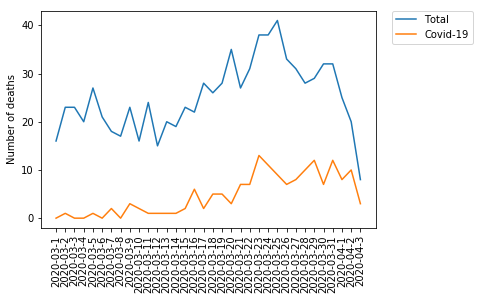

In [18]:
plt.plot(xdate[1:][::-1], ydeaths[::-1], label='Total')
plt.plot(xdate[1:][::-1], ycovid[::-1],label='Covid-19')
plt.xticks(rotation='vertical')
plt.ylabel('Number of deaths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

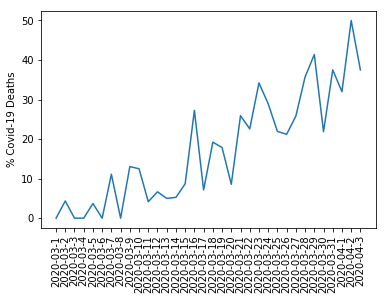

In [19]:
percent = [ ycovid[i]/ydeaths[i]*100 for i in range(len(xdate)-1)]
plt.plot(xdate[1:][::-1], percent[::-1])
plt.xticks(rotation='vertical')
plt.ylabel('% Covid-19 Deaths')
plt.show()

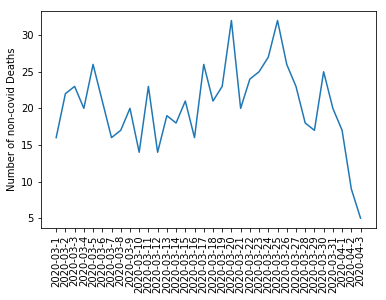

In [7]:
diff = [ ydeaths[i]-ycovid[i] for i in range(len(xdate)-1)]
plt.plot(xdate[1:][::-1], diff[::-1])
plt.xticks(rotation='vertical')
plt.ylabel('Number of non-covid Deaths')
plt.show()

In [16]:
date

[2020, 'March', '1']

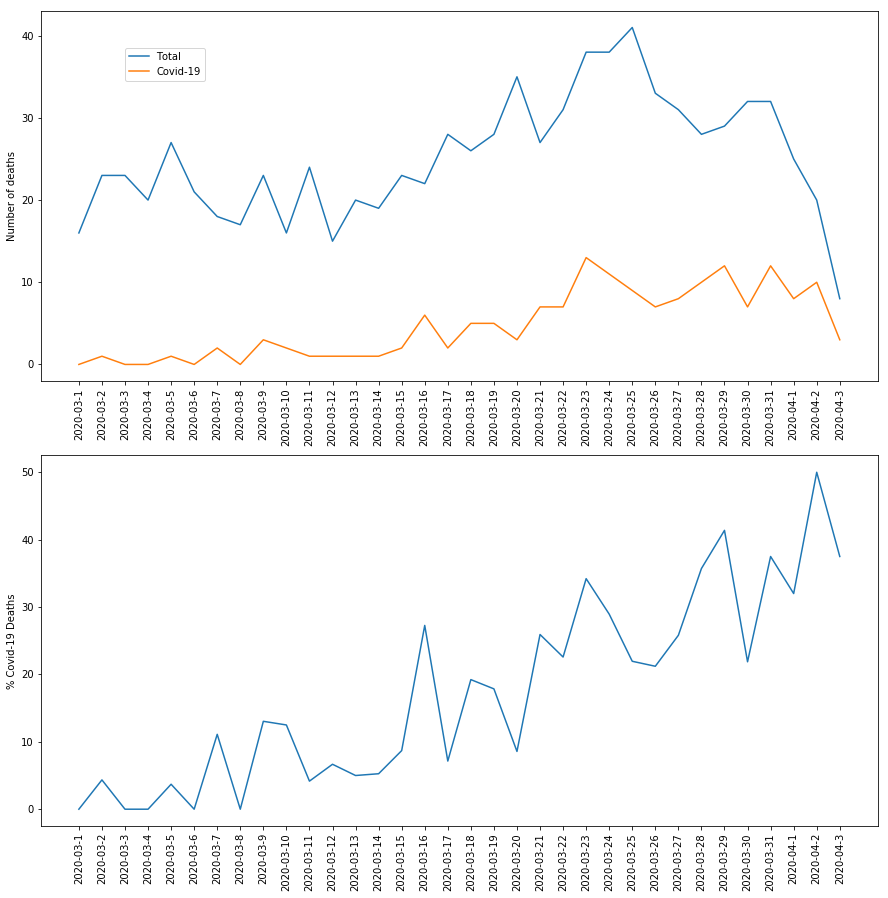

In [37]:
plt.figure(figsize=(15,15))

plt.subplot(2, 1, 1)
plt.plot(xdate[1:][::-1], ydeaths[::-1], label='Total')
plt.plot(xdate[1:][::-1], ycovid[::-1],label='Covid-19')
plt.xticks(rotation='vertical')
plt.ylabel('Number of deaths')
plt.legend(bbox_to_anchor=(0.1,0.9), loc='upper left', borderaxespad=0.)

plt.subplot(2, 1, 2)
percent = [ ycovid[i]/ydeaths[i]*100 for i in range(len(xdate)-1)]
plt.plot(xdate[1:][::-1], percent[::-1])
plt.xticks(rotation='vertical')
plt.ylabel('% Covid-19 Deaths')

plt.savefig('plots_notable/notable'+str(date.today()))